In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# 1) Business Understanding


# Data Gathering


In [2]:
calendar = pd.read_csv('calendar.csv')

In [3]:
listings = pd.read_csv('listings.csv')

In [4]:
reviews = pd.read_csv('reviews.csv')

# Data Assessment

In [5]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [6]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [7]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


# Prepare Data

In [8]:
# Missing values in any rows or columns
print(calendar.isnull().any())
print()
print(listings.isnull().any())
print()
print(reviews.isnull().any())

listing_id    False
date          False
available     False
price          True
dtype: bool

id                                  False
listing_url                         False
scrape_id                           False
last_scraped                        False
name                                False
summary                              True
space                                True
description                         False
experiences_offered                 False
neighborhood_overview                True
notes                                True
transit                              True
thumbnail_url                        True
medium_url                           True
picture_url                         False
xl_picture_url                       True
host_id                             False
host_url                            False
host_name                            True
host_since                           True
host_location                        True
host_about               


# Check datatypes and convert

In [9]:
calendar['price'] = calendar['price'].str.replace('$', '')
calendar['price'] = calendar['price'].str.replace(',', '')
calendar['price'] = calendar['price'].astype(float)
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [12]:
# transform amenities values to one or zero

amenities = []

for val in listings.amenities:
    try:
        # remove brackets
        val =  val[1:-1]
        # remove quote sign
        val = val.replace("\"", "")
        amenities.extend(val.split(','))
    except AttributeError:
        pass

# convert to set
amenities = set(amenities)

# remove empty string
amenities.remove('')
print(amenities)

{'Safety Card', 'Washer', 'Cable TV', '24-Hour Check-in', 'Wheelchair Accessible', 'Buzzer/Wireless Intercom', 'Washer / Dryer', 'Carbon Monoxide Detector', 'Dog(s)', 'Iron', 'Wireless Internet', 'Fire Extinguisher', 'Lock on Bedroom Door', 'Gym', 'TV', 'Hair Dryer', 'Free Parking on Premises', 'Cat(s)', 'Breakfast', 'Laptop Friendly Workspace', 'Smoke Detector', 'Suitable for Events', 'Elevator in Building', 'Hangers', 'Family/Kid Friendly', 'Pets Allowed', 'Hot Tub', 'Smoking Allowed', 'Dryer', 'Pets live on this property', 'Other pet(s)', 'Air Conditioning', 'Shampoo', 'Doorman', 'Indoor Fireplace', 'Heating', 'First Aid Kit', 'Essentials', 'Kitchen', 'Internet', 'Pool'}


In [14]:
def split_bolean(val, amenity_check):
    try:
        if val.find(amenity_check) >-1:
            return 1
        else:
            return 0
    except AttributeError:
        return 0
# convert values    
for amenity in amenities:        
    listings[amenity] = listings['amenities'].apply(lambda x: split_bolean(x, amenity))
        
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,Air Conditioning,Shampoo,Doorman,Indoor Fireplace,Heating,First Aid Kit,Essentials,Kitchen,Internet,Pool
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,1,0,0,0,1,0,0,1,1,0
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,0,0,0,0,1,1,1,1,1,0
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,1,1,0,1,1,0,1,1,1,0
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,0,1,0,1,1,0,1,1,1,0
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,0,1,0,0,1,1,1,1,1,0


In [15]:
# Convert Nan prices into 0 price
calendar['price'].fillna(0, inplace=True)
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,0.0
3,241032,2016-01-07,f,0.0
4,241032,2016-01-08,f,0.0


In [16]:
# Convert column 'available' to a true boolean
calendar['available'] = calendar['available'] == 't'

In [17]:
calendar['available'].value_counts()

True     934542
False    459028
Name: available, dtype: int64

In [18]:
calendar['date'].value_counts()

2016-05-12    3818
2016-11-05    3818
2016-08-07    3818
2016-10-05    3818
2016-12-28    3818
2016-02-15    3818
2016-07-28    3818
2016-08-01    3818
2016-12-13    3818
2016-03-31    3818
2016-07-15    3818
2016-12-26    3818
2016-02-25    3818
2016-04-16    3818
2016-10-10    3818
2016-07-14    3818
2016-01-20    3818
2016-10-08    3818
2016-03-26    3818
2016-02-08    3818
2016-06-29    3818
2016-07-17    3818
2016-07-20    3818
2016-05-03    3818
2016-05-11    3818
2016-01-28    3818
2016-03-05    3818
2016-03-13    3818
2016-04-27    3818
2016-07-22    3818
              ... 
2016-12-11    3818
2016-02-28    3818
2016-07-25    3818
2016-05-06    3818
2016-04-12    3818
2016-11-28    3818
2016-01-17    3818
2016-10-20    3818
2016-05-22    3818
2016-06-07    3818
2016-10-29    3818
2016-06-18    3818
2016-09-14    3818
2016-10-30    3818
2016-06-08    3818
2016-11-08    3818
2016-03-19    3818
2016-04-18    3818
2016-05-26    3818
2017-01-01    3818
2016-12-15    3818
2016-08-18  

In [19]:
calendar['date'].min()

'2016-01-04'

In [20]:
calendar['date'].max()

'2017-01-02'

In [21]:

# Convert column 'date' to a true datetype
calendar['date'] = pd.to_datetime(calendar['date'])

In [22]:
calendar.dtypes

listing_id             int64
date          datetime64[ns]
available               bool
price                float64
dtype: object

In [23]:
t=listings.groupby(['property_type', 'room_type']).agg({'id':'count'})
t

id
property_type   room_type            
Apartment       Entire home/apt  1428
                Private room      229
                Shared room        51
Bed & Breakfast Entire home/apt     3
                Private room       33
                Shared room         1
Boat            Entire home/apt     4
                Private room        4
Bungalow        Entire home/apt    12
                Private room        1
Cabin           Entire home/apt    16
                Private room        5
Camper/RV       Entire home/apt     9
                Private room        3
                Shared room         1
Chalet          Entire home/apt     1
                Private room        1
Condominium     Entire home/apt    72
                Private room       18
                Shared room         1
Dorm            Shared room         2
House           Entire home/apt   894
                Private room      784
                Shared room        55
Loft            Entire home/apt    30
                Private room        9
                Shared room         1
Other           Entire home/apt    12
                Private room        8
                Shared room         2
Tent            Entire home/apt     3
                Private room        1
                Shared room         1
Townhouse       Entire home/apt    54
                Private room       62
                Shared room         2
Treehouse       Entire home/apt     1
                Private room        2
Yurt            Entire home/apt     1

In [24]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,True,85.0
1,241032,2016-01-05,True,85.0
2,241032,2016-01-06,False,0.0
3,241032,2016-01-07,False,0.0
4,241032,2016-01-08,False,0.0


## ^^ Visualizations ^^

# 1 ) which month is  highest  price for Seattle city?


In [25]:
calendar.date = pd.to_datetime(calendar.date)
calendar['month'] = calendar.date.apply(lambda x:x.month)

C:\Users\PC\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


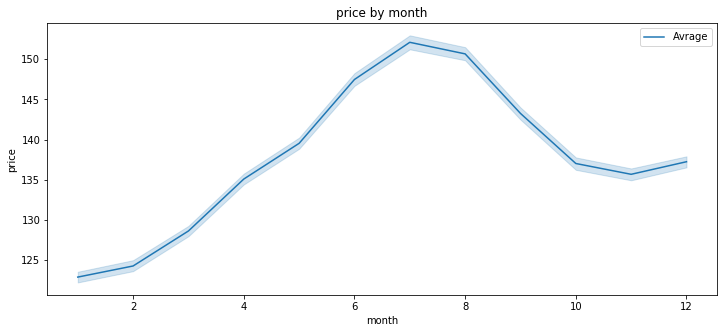

In [26]:
f = plt.figure(figsize=(12,5))
sns.lineplot(x='month',y='price',data=calendar[(calendar.price != 0)]);
plt.title('price by month')
plt.legend(labels=['Avrage']);


# Answer to question 1:
Above plot shows a trend for price in Seattle. The lowset price appeared at the begining of year. Maybe beacuase the holiday days. The price started to rise since Feb and reached the peak in the middle of year and last for roughly two months. Then back to the average level.
Further more, the price will rose on summer months—June, July, and August and fall back on other months. 

# 2) what is the highest no. of Accommodation by neighborhood?


In [27]:
# Accomodation listings split by neighbourhood
listings['neighbourhood_group_cleansed'].value_counts()

Other neighborhoods    794
Capitol Hill           567
Downtown               530
Central Area           369
Queen Anne             295
Ballard                230
West Seattle           203
Rainier Valley         159
University District    122
Beacon Hill            118
Cascade                 89
Northgate               80
Delridge                79
Lake City               67
Magnolia                61
Seward Park             44
Interbay                11
Name: neighbourhood_group_cleansed, dtype: int64

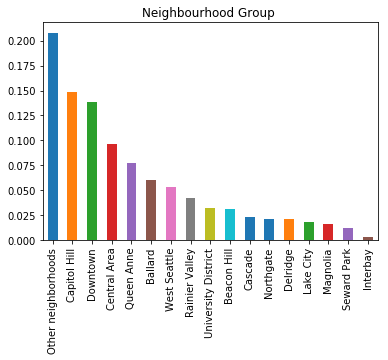

In [28]:
# Explore Categorical Feature - neighborhood_group_cleansed
neigh_vals = listings['neighbourhood_group_cleansed'].value_counts()
(neigh_vals/listings.shape[0]).plot(kind="bar");
plt.title("Neighbourhood Group ");

Answer 2: As the bar plot, we can see Capitol Hill, Downtown, and Central Area have the highest number of accommodation.

# 3) Which neighborhoods have the highest rating review scores?


In [29]:
listings.groupby('neighbourhood_group_cleansed')['review_scores_rating'].mean().sort_values(ascending=False)

neighbourhood_group_cleansed
Central Area           96.009404
West Seattle           95.864198
Delridge               95.861538
Ballard                95.533679
Queen Anne             95.443089
Seward Park            95.025641
Rainier Valley         94.731343
Northgate              94.692308
Other neighborhoods    94.562500
Lake City              94.375000
Capitol Hill           94.184783
Beacon Hill            94.019417
Downtown               93.958333
Magnolia               93.787234
Interbay               93.777778
Cascade                92.461538
University District    88.437500
Name: review_scores_rating, dtype: float64

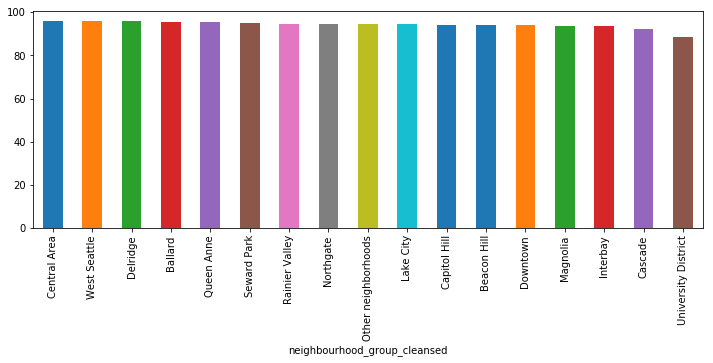

In [30]:
NeighborhoodRating = listings.groupby('neighbourhood_group_cleansed')['review_scores_rating'].mean().sort_values(ascending=False)
NeighborhoodRating.plot.bar(figsize=(12,4))

Answer3 : Central Area, West Seattle, and Delridge have the highest review score ratings.

# 4) Which neighborhoods have the highest listing prices?


In [31]:
# Removes commas and spaces from a price field so that this field can be successfully converted to a float data type
listings['price'] = listings['price'].replace(',', '', regex=True)
listings['price'] = listings['price'].map(lambda x: str(x)[1:])
listings['price'] = listings['price'].str.strip()


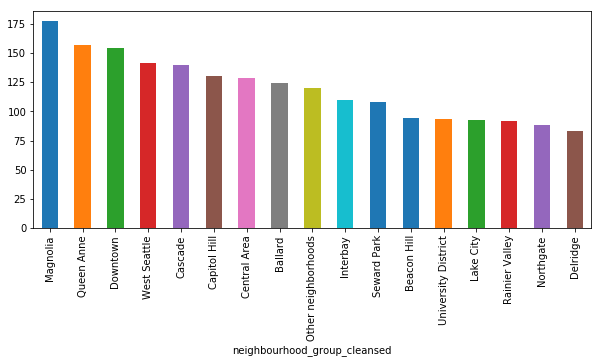

In [32]:
listings['price'] = listings['price'].astype(float)

# Groups a dataframe by "neighbourhood_group_cleansed" and displays a chart with the means of "price_listing"
NeighborhoodPrice = listings.groupby('neighbourhood_group_cleansed')['price'].mean().sort_values(ascending=False)
NeighborhoodPrice.plot.bar(figsize=(10,4))

Answer4: As bar plot we can see Magnolia, Queen Anne, and Downtown have the highest listing prices.



# 5) Which most type of Accomodation used in seattle?


In [33]:
listings['property_type'].value_counts()

House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Camper/RV            13
Bungalow             13
Boat                  8
Tent                  5
Treehouse             3
Dorm                  2
Chalet                2
Yurt                  1
Name: property_type, dtype: int64

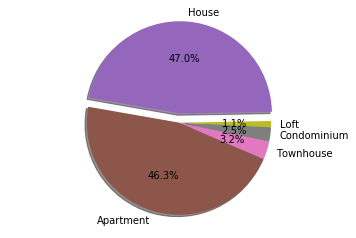

In [34]:
# Data to plot
labels = 'House', 'Apartment', 'Townhouse', 'Condominium', 'Loft'
sizes = [1733, 1708, 118, 91, 40]
colors =['tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
explode = (0.1,0,0,0,0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=1)

plt.axis('equal')
plt.show()

Answer5: Pie chart represents the most type of Accommodation which is (House, Apartment and TownHouse).